In [126]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from patsy import dmatrices
import math
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
import pyroc
from sklearn.metrics import precision_recall_fscore_support


In [127]:
%matplotlib notebook

In [128]:
plt.style.use('ggplot')

In [129]:
plt.rcParams['figure.figsize'] = (13,8)

In [130]:
df=pd.read_csv("./winequality-red.csv")

In [131]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [132]:
df.loc[df.quality > 5, 'category'] = 1
df.loc[df.quality <= 5, 'category'] = 0

In [133]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [134]:
df_train=df.iloc[:500,]
df_test=df.iloc[500:,]

In [135]:
y, X = dmatrices('category ~ alcohol+sulphates+chlorides',df_train, return_type="dataframe")
y=np.ravel(y)
y2, X2= dmatrices('category ~ alcohol+sulphates+chlorides',df_test, return_type="dataframe")
y2=np.ravel(y2)
y3,X3=dmatrices('category ~ alcohol+sulphates+chlorides',df, return_type="dataframe")
y3=np.ravel(y)

In [136]:
clf=RandomForestClassifier(n_estimators=100)
#default=10 trees
X

,Intercept,alcohol,sulphates,chlorides
0,1.0,9.4,0.56,0.076
1,1.0,9.8,0.68,0.098
2,1.0,9.8,0.65,0.092
3,1.0,9.8,0.58,0.075
4,1.0,9.4,0.56,0.076
5,1.0,9.4,0.56,0.075
6,1.0,9.4,0.46,0.069
7,1.0,10.0,0.47,0.065
8,1.0,9.5,0.57,0.073
9,1.0,10.5,0.80,0.071


In [137]:
X

#y

,Intercept,alcohol,sulphates,chlorides
0,1.0,9.4,0.56,0.076
1,1.0,9.8,0.68,0.098
2,1.0,9.8,0.65,0.092
3,1.0,9.8,0.58,0.075
4,1.0,9.4,0.56,0.076
5,1.0,9.4,0.56,0.075
6,1.0,9.4,0.46,0.069
7,1.0,10.0,0.47,0.065
8,1.0,9.5,0.57,0.073
9,1.0,10.5,0.80,0.071


In [138]:
X2

,Intercept,alcohol,sulphates,chlorides
500,1.0,9.0,0.65,0.081
501,1.0,12.0,0.85,0.074
502,1.0,12.0,0.85,0.074
503,1.0,10.9,1.04,0.078
504,1.0,10.8,1.05,0.077
505,1.0,12.5,0.78,0.072
506,1.0,10.8,1.02,0.075
507,1.0,9.5,0.71,0.084
508,1.0,10.2,0.63,0.090
509,1.0,11.4,0.68,0.084


In [139]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
predicted=clf.predict(X2)

In [141]:
predicted

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [142]:
X2.head()

,Intercept,alcohol,sulphates,chlorides
500,1.0,9.0,0.65,0.081
501,1.0,12.0,0.85,0.074
502,1.0,12.0,0.85,0.074
503,1.0,10.9,1.04,0.078
504,1.0,10.8,1.05,0.077


In [143]:
clf.score(X2,y2)

0.69062784349408557

In [144]:
clf.score(X,y)

0.99399999999999999

In [145]:
y_true = df_test['category']
y_pred = predicted
precision_recall_fscore_support(y_true, y_pred, average='binary')

(0.70687022900763363, 0.7577741407528642, 0.73143759873617697, None)

In [146]:
X2['predicted']=predicted

<IPython.core.display.Javascript object>


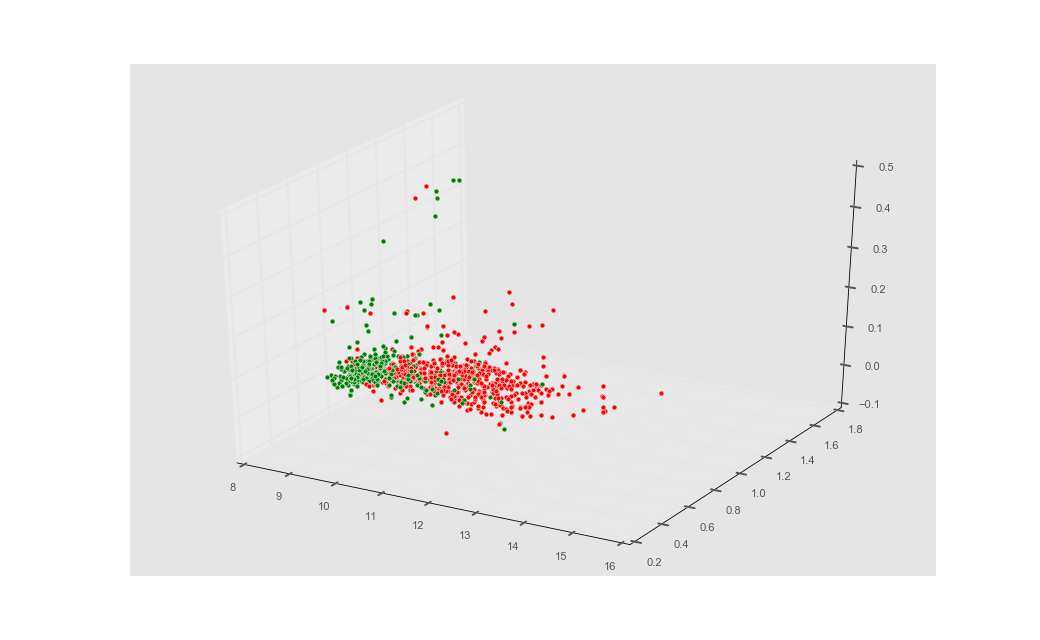

In [147]:
fig = plt.figure()#.gca(projection='3d')
ax2 = fig.add_subplot(111, projection='3d')
col=['g','r']
for i in range(0,1099):
    ax2.scatter(X2.iloc[i]['alcohol'], X2.iloc[i]['sulphates'], X2.iloc[i]['chlorides'], zdir='z', s=20, \
                c=col[int(X2.iloc[i]['predicted'])], depthshade=True)